# Proyek Analisis Data: Bike_Sharing Dataset
- **Nama:** Malvin Nuraffi Herdyanto
- **Email:** malvinherdyanto@gmail.com
- **ID Dicoding:** mlv_malvinn

## Menentukan Pertanyaan Bisnis

###Pertanyaan 1
- Melihat gambaran jumlah pengguna dalam kurun waktu 1 tahun, apakah terdapat sebuah pola tren yang dapat disimpulkan? jika benar adanya pola, bagaimana polanya serta pada tahun berapa jumlah pengguna berapa pada titik tertingginya?


###Pertanyaan 2
- Melihat data yang ada, korelasi apa yang dapat diambil antara cuaca SERTA musim dengan jumlah dari pengguna sepeda? lalu pada cuaca SERTA musim apa tingkat pengguna mengalami titik terendahnya?

## Import Semua Packages/Library yang Digunakan

In [193]:
#Import lib yang dibutuhkan
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Importing bike_sharing data**

Didalam dataset "Bike Sharing" terdapat 2 buah file .csv yaitu day.csv serta hour.csv

Table day.csv

In [194]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Table hour.csv

In [195]:
hr_df = pd.read_csv("/content/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### **Evaluasi data dari day.csv**


>
1.   Cek tipe-tipe data
2.   Cek missing value
3.   Cek duplicated value
4.   Cek abnormality / Outlier

In [196]:
# 1. Cek tipe-tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari data yang kita tarik ditemukan bahwa terdapat sebuah kolom dengan tipe data yang tidak sesuai yaitu:

**dtday -> object**

seharusnya:

**dtday -> datetime**

In [197]:
# 2. Cek missing value(s)
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak kita temukan satupun missing value didalam data table day.csv, oleh sebab itu kita tidak harus melakukan apapun mengenai missing value.

In [198]:
# 3. Cek duplicated value(s)
print("Data duplikasi: ", day_df.duplicated().sum())

Data duplikasi:  0


Disimpulkan dari kode tersebut bahwa semua data value(s) yang terdapat di dalam day.csv bersifat unique, artinya tidak ada satupun value yang bernilai sama dengan yang lainnya.

In [199]:
# 4. Cek data value(s) yang bernilai abnormal
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Sejauh ini dapat kita tarik kesimpulan bahwa semua value berada pada nilai yang wajar / normal.

#### **Evaluasi data dari hour.csv**


>
1.   Cek tipe-tipe data
2.   Cek missing value
3.   Cek duplicated value
4.   Cek abnormality / Outlier

In [200]:
# 1. Cek tipe-tipe data
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Ternyata sama dengan day.csv

Dari data yang kita tarik ditemukan bahwa terdapat sebuah kolom dengan tipe data yang tidak sesuai yaitu:

**dtday -> object**

seharusnya:

**dtday -> datetime**

In [201]:
# 2. Cek missing value(s)
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak kita temukan satupun missing value didalam data table day.csv, oleh sebab itu kita tidak harus melakukan apapun mengenai missing value.

In [202]:
# 3. Cek duplicated value(s)
print("Data duplikasi: ", hr_df.duplicated().sum())

Data duplikasi:  0


Disimpulkan dari kode tersebut bahwa semua data value(s) yang terdapat di dalam day.csv bersifat unique, artinya tidak ada satupun value yang bernilai sama dengan yang lainnya.

In [203]:
# 4. Cek data value(s) yang bernilai abnormal
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Sejauh ini dapat kita tarik kesimpulan bahwa semua value berada pada nilai yang wajar / normal.

### Cleaning Data

___________________________________________________
Dalam mengambil data, akan lebih mudah jika informasi yang diberikan berupa penjelasan yang deskriptif, tidak seperti halnya sekarang yang dimana di dalam tablenya kondisi dari 'musim' serta 'cuaca' berupa angka yang merepresentasikan keadaan sebenarnya.

Oleh sebab itu kita lebih baik mengubahnya menjadi sebuah keterangan.

In [204]:

# Konversi kode angka menjadi keterangan
day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
    7: 'Jul', 8: 'Ags', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
})
day_df['season'] = day_df['season'].map({
    1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan/Salju Ringan',
    4: 'Cuaca Buruk'
})

___________________________________________________
Melihat tipe data dari kolom dteday merupakan tipe object, maka kita harus mengubahnya menjadi datetime agar sesuai.

lalu kita juga akan mengubah tipe data-data yang berhubungan dengan hari, cuaca dan musim menjadi kategorikal.

In [205]:

# Konversi tipe dteday menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df.dteday)
# Konversi tipe kolom menjadi kategorikal
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Semi,2011,Jan,0,Sabtu,0,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Semi,2011,Jan,0,Minggu,0,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Semi,2011,Jan,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Semi,2011,Jan,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Semi,2011,Jan,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


___________________________________________________
Melihat bahwa kita tidak memerlukan data dari pandangan waktu dalam jam, maka kita bisa mengabaikan table dari hour.csv.


Lalu pada table data day.csv terdapat beberapa kolom yang tidak berguna untuk menjawab pertanyaan kita, yaitu:

1. instant
2. temp
3. atemp
4. hum
5. windspeed

Kolom-kolom tersebut dapat saja kita abaikan, atau dapat kita rapihkan dengan menghapusnya agar tidak menjadi *Clutter* pada data kita.

In [206]:
# Menghapus beberapa kolom yang tidak dibutuhkan
drop_col = ['instant', 'temp', 'atemp', 'hum', 'windspeed']
for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

# Menampilkan 5 row teratas dari isi table day.csv
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,Musim Semi,2011,Jan,0,Sabtu,0,Berawan,331,654,985
1,2011-01-02,Musim Semi,2011,Jan,0,Minggu,0,Berawan,131,670,801
2,2011-01-03,Musim Semi,2011,Jan,0,Senin,1,Cerah,120,1229,1349
3,2011-01-04,Musim Semi,2011,Jan,0,Selasa,1,Cerah,108,1454,1562
4,2011-01-05,Musim Semi,2011,Jan,0,Rabu,1,Cerah,82,1518,1600


In [207]:
# Menampilkan informasi kolom serta tipenya
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   casual      731 non-null    int64         
 9   registered  731 non-null    int64         
 10  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(3)
memory usage: 29.4 KB


## Exploratory Data Analysis (EDA)

### Explore ...

In [208]:
# Mengelompokkan penyewa sepeda (casual / registered) terhadap tahun
day_df.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max  min         mean      sum
yr                                   
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

Dari hasil yang kita dapatkan, kita dapat menyimpulkan bahwa pada tahun 2012 merupakan tahun dengan jumlah penyewa tertinggi namun memiliki titik penyewa terendah.

Sebaliknya dengan tahun 2011 dimana titik terendahnya lebih tinggi.
___________________________________________________

In [209]:
# Mengelompokkan penyewa sepeda (casual / registered) terhadap bulan pada tahun ke-0
day_df.loc[day_df['yr'] == '2011'].groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Ags   5895  1115  4409.387097  136691
Apr   5312   795  3162.333333   94870
Des   3940   705  2816.870968   87323
Feb   2927  1005  1721.964286   48215
Jan   1985   431  1231.903226   38189
Jul   6043  3285  4559.387097  141341
Jun   5515  3767  4783.733333  143512
Mar   3239   605  2065.967742   64045
Mei   5805  2633  4381.322581  135821
Nov   4486  1495  3405.566667  102167
Okt   5511   627  3984.225806  123511
Sep   5423  1842  4247.266667  127418

Dalam data yang diambil diatas, dapat kita lihat bahwa pada tahun 2011 pada bulan, jumlah orang yang menyewa sepeda berada di tingkat tertinggi pada bulan **Juni**, lalu untuk tingkat terendah berada pada bulan **Januari**.
___________________________________________________

In [210]:
# Mengelompokkan penyewa sepeda (casual / registered) terhadap bulan pada tahun ke-1
day_df.loc[day_df['yr'] == '2012'].groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Ags   7865  4549  6919.451613  214503
Apr   7460  1027  5807.466667  174224
Des   6606   441  3990.741935  123713
Feb   5062  1529  3556.448276  103137
Jan   4521  1301  3120.774194   96744
Jul   8173  4459  6567.967742  203607
Jun   8120  4127  6761.000000  202830
Mar   8362  3194  5318.548387  164875
Mei   8294  2843  6318.225806  195865
Nov   6852  2277  5088.800000  152664
Okt   8156    22  6414.225806  198841
Sep   8714  4073  7285.766667  218573

Untuk data yang didapatkan pada tahun 2012, dapat kita simpulkan bahwa jumlah total penyewa sepeda terbanyak berada pada bulan **September**, sedangkan untuk tingkat terendah berada pada bulan **Januari** juga, sama seperti tahun 2011.
___________________________________________________

In [211]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                     max  min         mean      sum
weathersit                                         
Berawan             8362  605  4035.862348   996858
Cerah               8714  431  4876.786177  2257952
Hujan/Salju Ringan  4639   22  1803.285714    37869

Pada hasil tersebut, dapat kita simpulkan bahwa pada cuaca hujan/salju ringan terdapat jumlah penyewa terendah, dan jumlah penyewa tertinggi pada cuaca cerah.
___________________________________________________

In [212]:
day_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
               max   min         mean      sum
season                                        
Musim Dingin  8555    22  4728.162921   841613
Musim Gugur   8714  1115  5644.303191  1061129
Musim Panas   8362   795  4992.331522   918589
Musim Semi    7836   431  2604.132597   471348

Dari hasil yang kita dapatkan, kita dapat menyimpulkan bahwa jumlah penyewa sepeda terbanyak berada pada musim gugur, yang dapat diperkirakan, namun hal yang diluar perkiraan adalah fakta bahwa jumlah penyewa terendah berada pada musim semi.
___________________________________________________

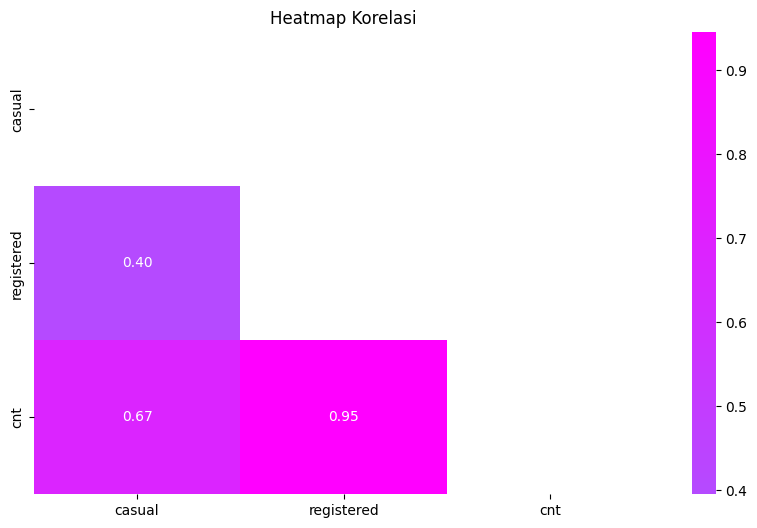

In [213]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix, annot=True, mask=mask, cmap="cool", center=0, fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

Berdasarkan hasil data yang kita dapatkan dari membuat heatmap korelasi, dapat kita simpulkan bahwa:
- penyewa yang terdaftar (registered) dapat dikatakan berkorelasi dengan nilai (0.40)
-untuk jumlah (cnt) dapat dikatakan cukup berkorelasi dengan penyewa biasa (casual) (0.67) namun sangat berkorelasi dengan penyewa terdaftar (registered) dengan nilai (0.95)

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Melihat gambaran jumlah pengguna dalam kurun waktu 1 tahun, apakah terdapat sebuah pola tren yang dapat disimpulkan? jika benar adanya pola, bagaimana polanya serta pada tahun berapa serta pada bulan apa jumlah pengguna berapa pada titik tertingginya?

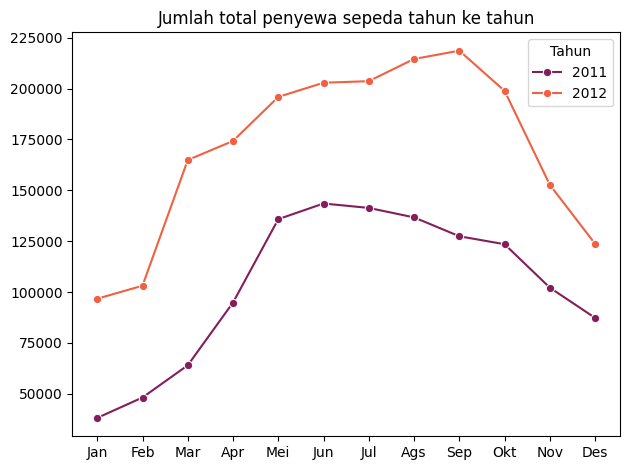

In [214]:
# Visualisasi line graph tahunan
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Ags','Sep','Okt','Nov','Des'],
    ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o")

plt.title("Jumlah total penyewa sepeda tahun ke tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Mengevaluasi hasil dari line graph yang kita dapatkan tersebut, untuk menjawab pertanyaan kita, kita dapat mengambil kesimpulan bahwa dari tahun 2011 menuju tahun 2012 sangatlah berbeda.

Keduanya memiliki bentuk pola yang mirip, dimana jumlah total pengguna menurun pada akhir tahun menuju 2-3 bulan pada awal tahun dan memuncak pada pertengahan tahun.

Namun untuk tingkat jumlah penyewa dari 2 tahun tersebut sangatlah berbeda, dimana pada 2012 jumlah penyewa terendah lebih tinggi daripada jumlah penyewa tertinggi pada tahun 2011.


Jadi untuk menjawab pertanyaannya:
> **Jumlah penyewa tertinggi berada pada tahun 2012 pada bulan September.**

### Pertanyaan 2:
Melihat data yang ada, korelasi apa yang dapat diambil antara cuaca SERTA musim dengan jumlah dari pengguna sepeda? lalu pada cuaca SERTA musim apa tingkat pengguna mengalami titik terendahnya?

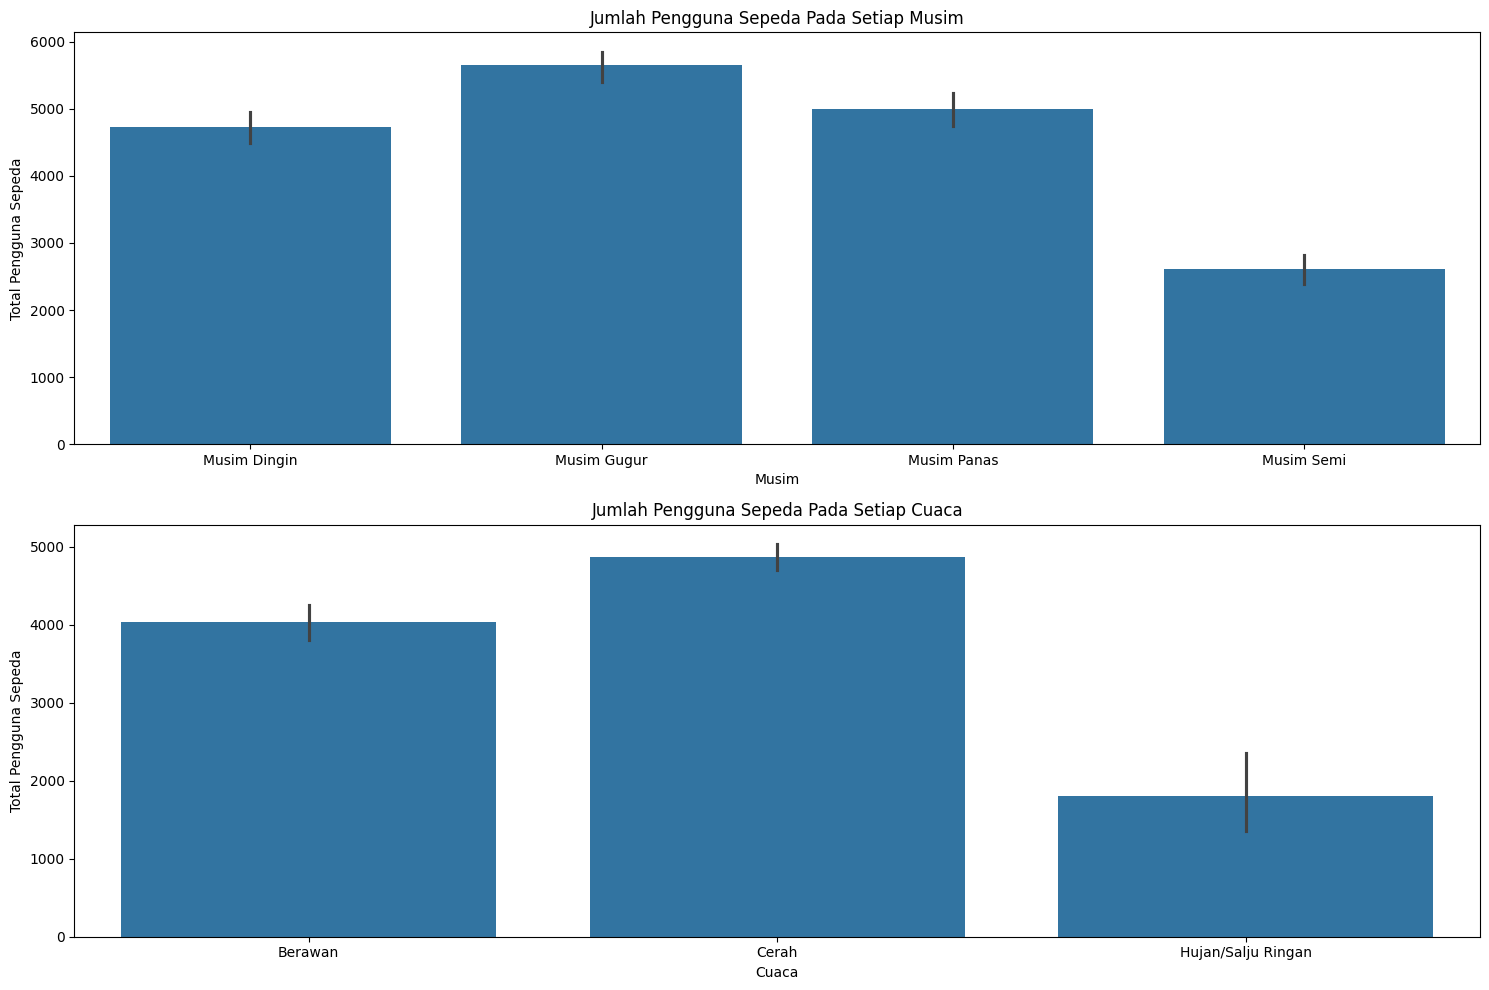

In [215]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# Visualisasi graph bar Musim
sns.barplot(
    x='season',
    y='cnt',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda Pada Setiap Musim')
axes[0].set_xlabel('Musim')
axes[0].set_ylabel('Total Pengguna Sepeda')
# Visualisasi graph bar cuaca
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda Pada Setiap Cuaca')
axes[1].set_xlabel('Cuaca')
axes[1].set_ylabel('Total Pengguna Sepeda')

plt.tight_layout()
plt.show()

Hasil visualisasi data diatas menunjukan bahwa korelasi yang didapatkan antara pengguna sepeda dengan musim dan cuaca berada pada musim gugur serta pada cuaca cerah yang memiliki jumlah pengguna sepeda tertinggi, sementara untuk musim semi dan pada cuaca hujan/salju ringan memiliki tingkat pengguna terendah.

## Conclusion

- Conclution pertanyaan 1: Hasil yang kita dapatkan menunjukan pernyataan yang solid bahwa terdapat sebuah tren dalam setiap tahun (setidaknya 2 tahun pertama) dimana tingkat pengguna/penyewa mengalami peningkatan pada awal tahun menuju pertengahan tahun memulai dari januari yang merupakan bulan dengan tingkat terendah dalam pengguna dalam kedua tahun tersebut (2011: < 50k pengguna, 2012: < 100k pengguna) lalu mnegalami tingkat pengguna/penyewa paling tinggi namun tidak menentu pada bulan april-oktober, sebelum akhirnya keduanya mengalami penurunan lagi hingga akhir tahun, lalu tidak setelah bulan januari tren tersebut terulang lagi.
Namun dari data tersebut dapat dipastikan bahwa pertengahan tahun (april-oktober) merupakan bulan dengan jumlah pengguna/penyewa tertinggi.

- Conclution pertanyaan 2: Berdasarkan evaluasi dari graf bar yang kita buat kita dapat menarik konklusi bahwa tingkat pengguna sepeda sepertinya berhubungan dengan musin dan cuaca yang dapat dikatakan nyaman, yaitu:
pada musim gugur dengan cuaca yang cerah, dengan kondisi tersebut maka dapat dipastikan bahwa tingkat jumlah pengguna akan berada pada titik tertingginya, untuk terendahnya, cuaca harus merupakan cuaca yang tidak nyaman untuk bersepeda, seperti: pada musim semi dengan hujan/salju.